# STARS clustering

### About this file

https://www.kaggle.com/deepu1109/star-dataset

This CSV file contains a dataset of 240 stars of 6 classes:

    Brown Dwarf -> Star Type = 0
    Red Dwarf -> Star Type = 1
    White Dwarf-> Star Type = 2
    Main Sequence -> Star Type = 3
    Supergiant -> Star Type = 4
    Hypergiant -> Star Type = 5

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.

    Lo = 3.828 x 10^26 Watts
    Ro = 6.9551 x 10^8 m

## Dimensions

    Temperature (K): this column consists of the Surface temperatures of stars
    Luminosity(L/Lo): this column consists of the Luminosity of stars calculated with respect to sun(L/Lo)
    Radius(R/Ro): this column consists of the Radius of stars calculated with respect to sun(R/Ro)
    Absolute magnitude(Mv): this column consists of the Absolute Visual magnitude(Mv) of several stars
    Star type: this column is the output class (6 classes ranging from 0-5) 
    Star color: this column contains the info about the colors of each star after Spectral Analysis
    Spectral Class: this column contains info about the spectral classes of each star(O,B,A,F,G,K,,M)

## Imports
    Librairies
    Data

In [154]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import missingno as msno

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth

In [155]:
raw_data = pd.read_csv("6 class csv.csv")

# Exploratory Data Analysis

In [156]:
raw_data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [157]:
O = raw_data[raw_data["Spectral Class"] == 'O']
B = raw_data[raw_data["Spectral Class"] == 'B']
A = raw_data[raw_data["Spectral Class"] == 'A']
F = raw_data[raw_data["Spectral Class"] == 'F']
G = raw_data[raw_data["Spectral Class"] == 'G']
K = raw_data[raw_data["Spectral Class"] == 'K']
M = raw_data[raw_data["Spectral Class"] == 'M']

In [158]:
plt.style.use('dark_background')

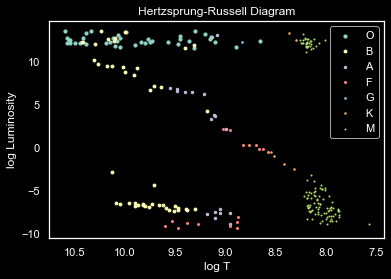

In [159]:
plt.grid()
plt.scatter(np.log(O["Temperature (K)"]), np.log(O["Luminosity(L/Lo)"]),10, label = 'O')
plt.scatter(np.log(B["Temperature (K)"]), np.log(B["Luminosity(L/Lo)"]),8, label = 'B')
plt.scatter(np.log(A["Temperature (K)"]), np.log(A["Luminosity(L/Lo)"]),6, label = 'A')
plt.scatter(np.log(F["Temperature (K)"]), np.log(F["Luminosity(L/Lo)"]),4, label = 'F')
plt.scatter(np.log(G["Temperature (K)"]), np.log(G["Luminosity(L/Lo)"]),3, label = 'G')
plt.scatter(np.log(K["Temperature (K)"]), np.log(K["Luminosity(L/Lo)"]),2, label = 'K')
plt.scatter(np.log(M["Temperature (K)"]), np.log(M["Luminosity(L/Lo)"]),1, label = 'M')
plt.gca().invert_xaxis()
plt.title("Hertzsprung-Russell Diagram")
plt.ylabel("log Luminosity")
plt.xlabel("log T")
plt.legend()

In [160]:
df = raw_data.copy()

In [161]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [163]:
df.columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute magnitude', 'Star type', 'Star color', 'Spectral Class']

In [164]:
df.isna().sum().sort_values(ascending = False)

Spectral Class        0
Star color            0
Star type             0
Absolute magnitude    0
Radius                0
Luminosity            0
Temperature           0
dtype: int64

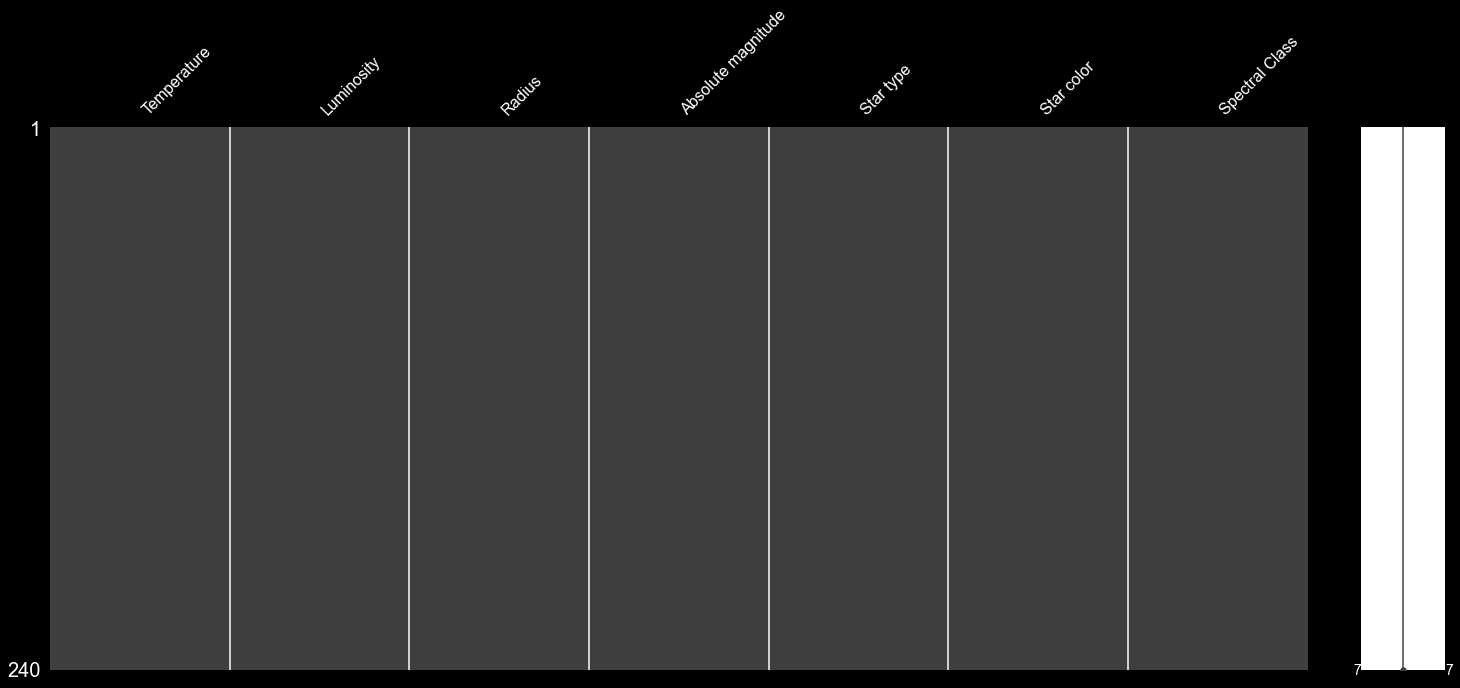

In [165]:
# Check missing values
ax = msno.matrix(df.sample(240))

In [166]:
# List unique values for categorical columns
for col in df.select_dtypes('object'):
    print(f'{col:-<30} {df[col].unique()}')

Star color-------------------- ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
Spectral Class---------------- ['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [167]:
# Star type
df['Star type'].replace([0,1,2,3,4,5],['Red Dwarf','White Dwarf','Brown Dwarf','Main Sequence','Supergiants','Hypergiants'],inplace=True)

# Harmonization of color names
df['Star color'].replace(['Blue White','Blue white','Blue-white','Blue white '],['Blue-White','Blue-White','Blue-White','Blue-White'],inplace=True)
df['Star color'].replace(['Yellowish White'],['Yellowish-White'],inplace=True)
df['Star color'].replace(['Pale yellow orange'],['Pale-Yellow-Orange'],inplace=True)
df['Star color'].replace(['yellow-white'],['Yellow-White'],inplace=True)
df['Star color'].replace(['white'],['White'],inplace=True)
df['Star color'].replace(['yellowish'],['Yellowish'],inplace=True)
df['Star color'].replace(['Blue '],['Blue'],inplace=True)

In [168]:
# List unique values for categorical columns
for col in df.select_dtypes('object'):
    print(f'{col:-<30} {df[col].unique()}')

Star type--------------------- ['Red Dwarf' 'White Dwarf' 'Brown Dwarf' 'Main Sequence' 'Supergiants'
 'Hypergiants']
Star color-------------------- ['Red' 'Blue-White' 'White' 'Yellowish-White' 'Pale-Yellow-Orange' 'Blue'
 'Whitish' 'Yellow-White' 'Orange' 'White-Yellow' 'Yellowish' 'Orange-Red']
Spectral Class---------------- ['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [169]:
for i in df: print("No of Values for {} is {}".format(i,str(df[i].nunique())))

No of Values for Temperature is 228
No of Values for Luminosity is 208
No of Values for Radius is 216
No of Values for Absolute magnitude is 228
No of Values for Star type is 6
No of Values for Star color is 12
No of Values for Spectral Class is 7


In [170]:
# Descriptive statistics on numerical features
df.describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
Temperature,240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity,240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius,240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude,240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06


In [171]:
df.groupby(['Star type']).nunique()

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Star color,Spectral Class
Star type,,,,,,,
Brown Dwarf,40,37,37,37,1,6,3
Hypergiants,39,37,37,38,1,5,6
Main Sequence,40,40,40,40,1,6,5
Red Dwarf,37,39,36,39,1,1,1
Supergiants,40,38,32,38,1,2,3
White Dwarf,37,37,35,40,1,1,1


In [172]:
# Information on categorical features
df.describe(include='object').T.head(1)

,count,unique,top,freq
Star type,240,6,Supergiants,40


In [173]:
palette={'Blue-White' : "#deebf7", 
         'Blue' : "#3182bd",
         'White' : "#f0f0f0",
         'Whitish' : "#bdbdbd",
         'White-Yellow'  : "#fff7bc",
         'Yellow-White' : "#ffeda0",
         'Yellowish-White' : "#edf8b1",
         'Yellowish'  : "#f7fcb9",
         'Pale-Yellow-Orange' : "#fec44f",
         'Orange' : "#feb24c",
         'Orange-Red' : "#d95f0e",
         'Red': "#ff3679"}

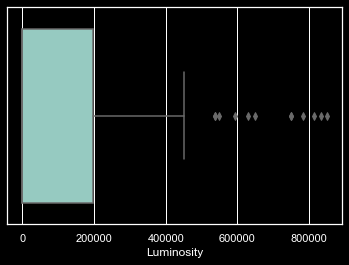

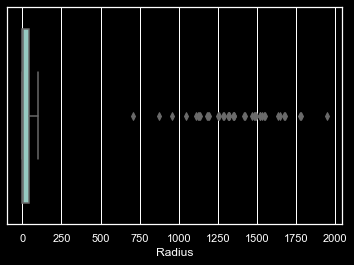

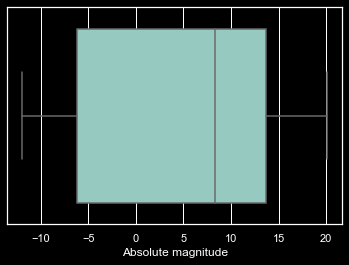

In [174]:
for col in df.select_dtypes('float64'):
    plt.figure()
    sns.boxplot(df[col])

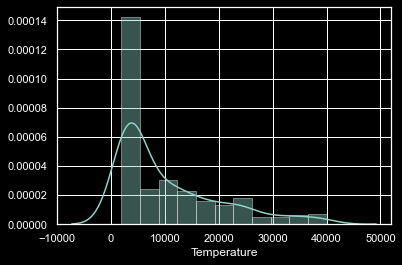

In [175]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

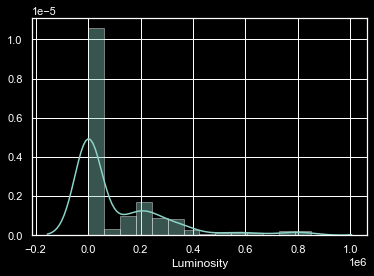

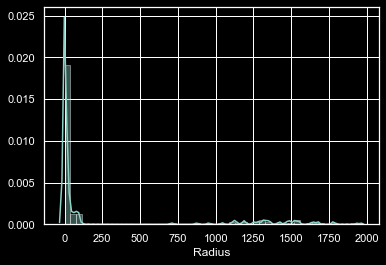

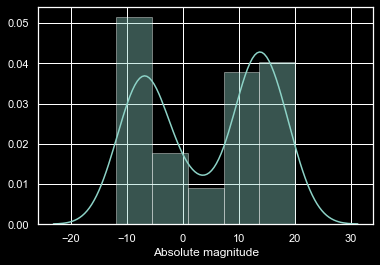

In [176]:
for col in df.select_dtypes('float64'):
    plt.figure()
    sns.distplot(df[col])

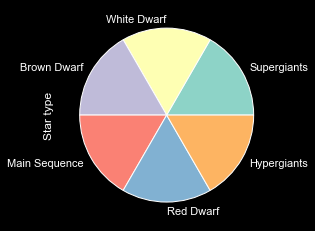

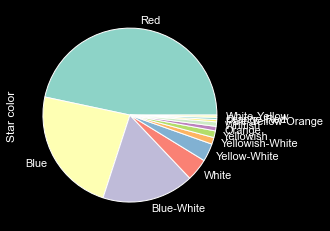

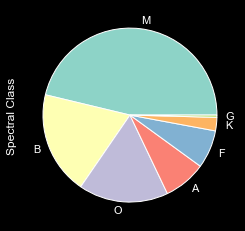

In [177]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

<Figure size 1440x216 with 0 Axes>

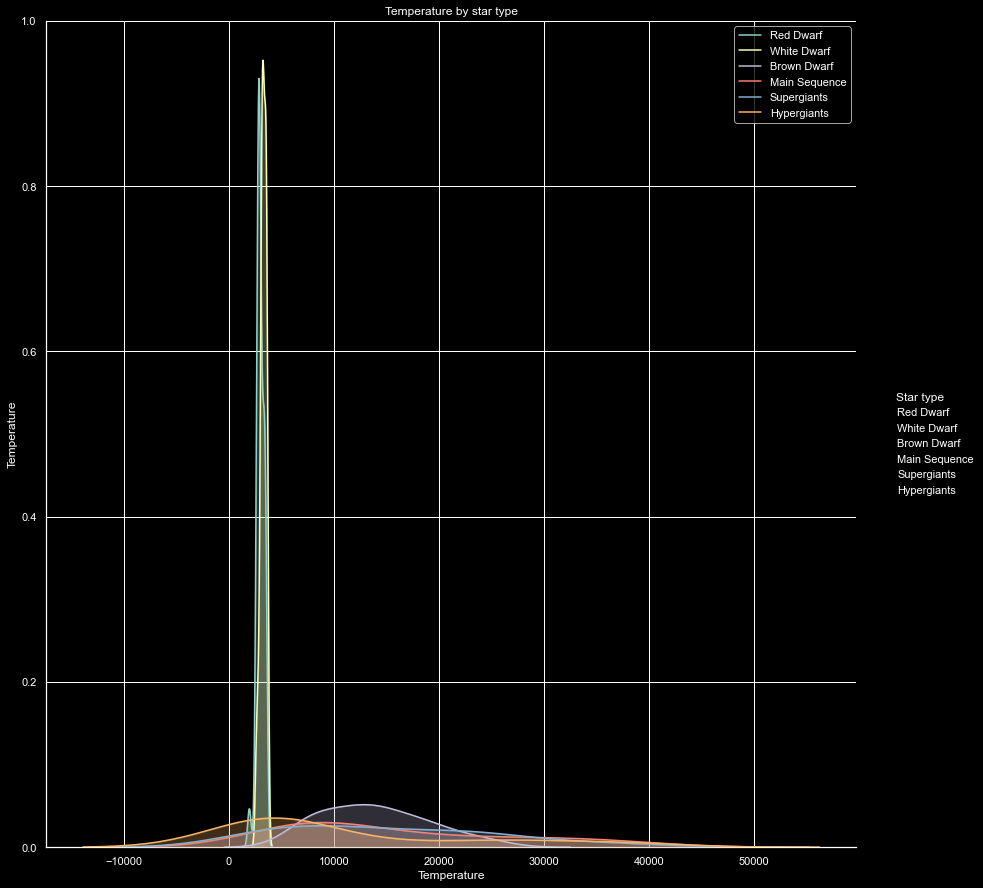

In [178]:
# Display relationships between variables
plt.figure(figsize=(20, 3))
temp_st = df[['Temperature','Star type']]
sns.pairplot(temp_st, hue = 'Star type', height=12)
plt.title('Temperature by star type')
plt.legend()

<Figure size 1440x216 with 0 Axes>

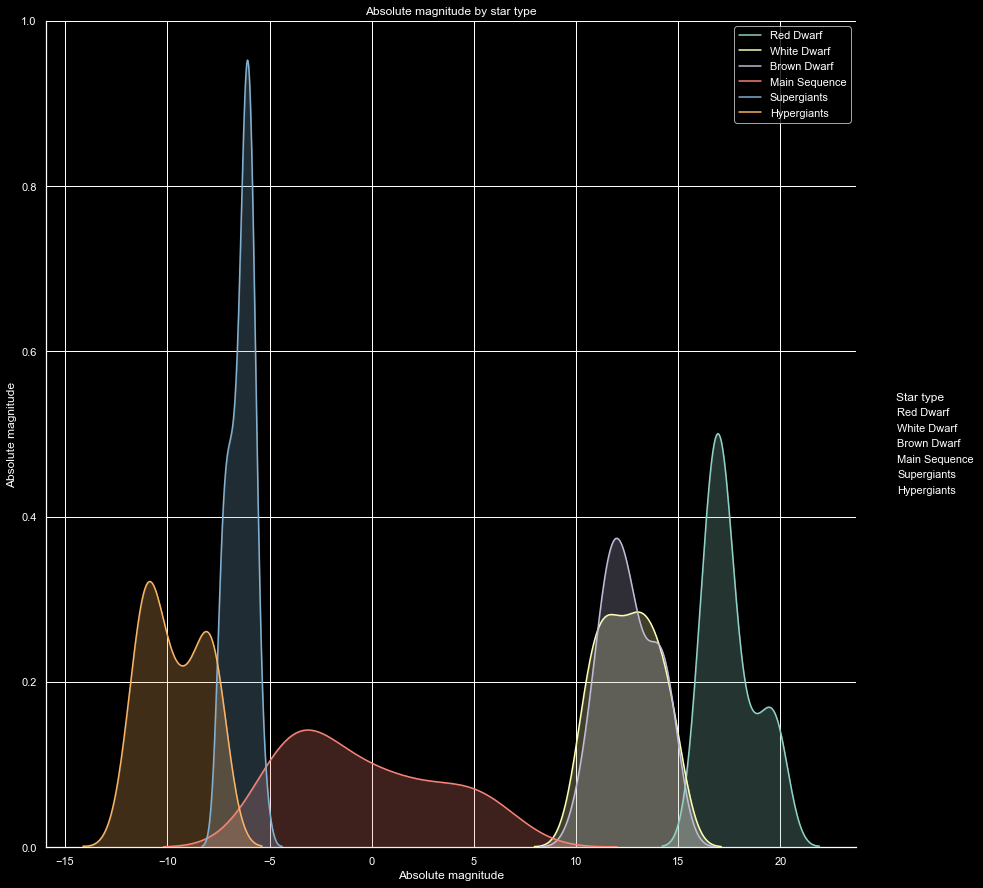

In [179]:
# Display relationships between variables
plt.figure(figsize=(20, 3))
temp_st = df[['Absolute magnitude','Star type']]
sns.pairplot(temp_st, hue = 'Star type', height=12)
plt.title('Absolute magnitude by star type')
plt.legend()

<Figure size 1440x216 with 0 Axes>

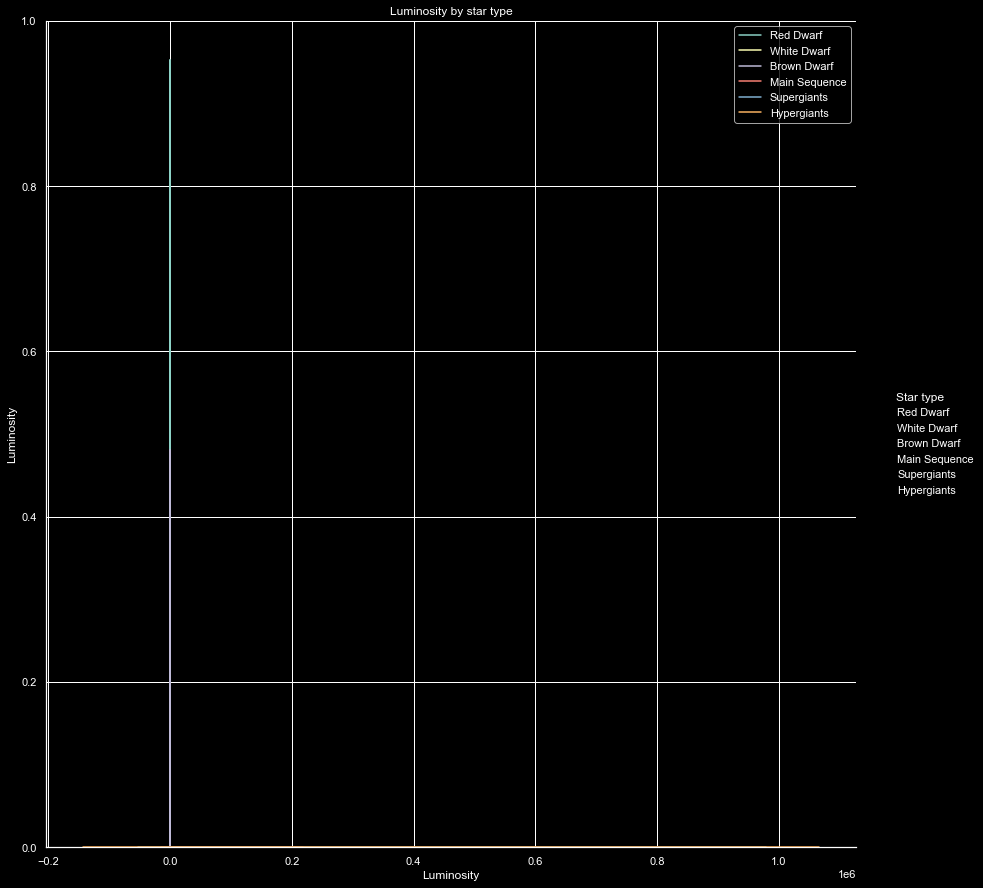

In [180]:
# Display relationships between variables
plt.figure(figsize=(20, 3))
temp_st = df[['Luminosity','Star type']]
sns.pairplot(temp_st, hue = 'Star type', height=12)
plt.title('Luminosity by star type')
plt.legend()

<Figure size 1440x216 with 0 Axes>

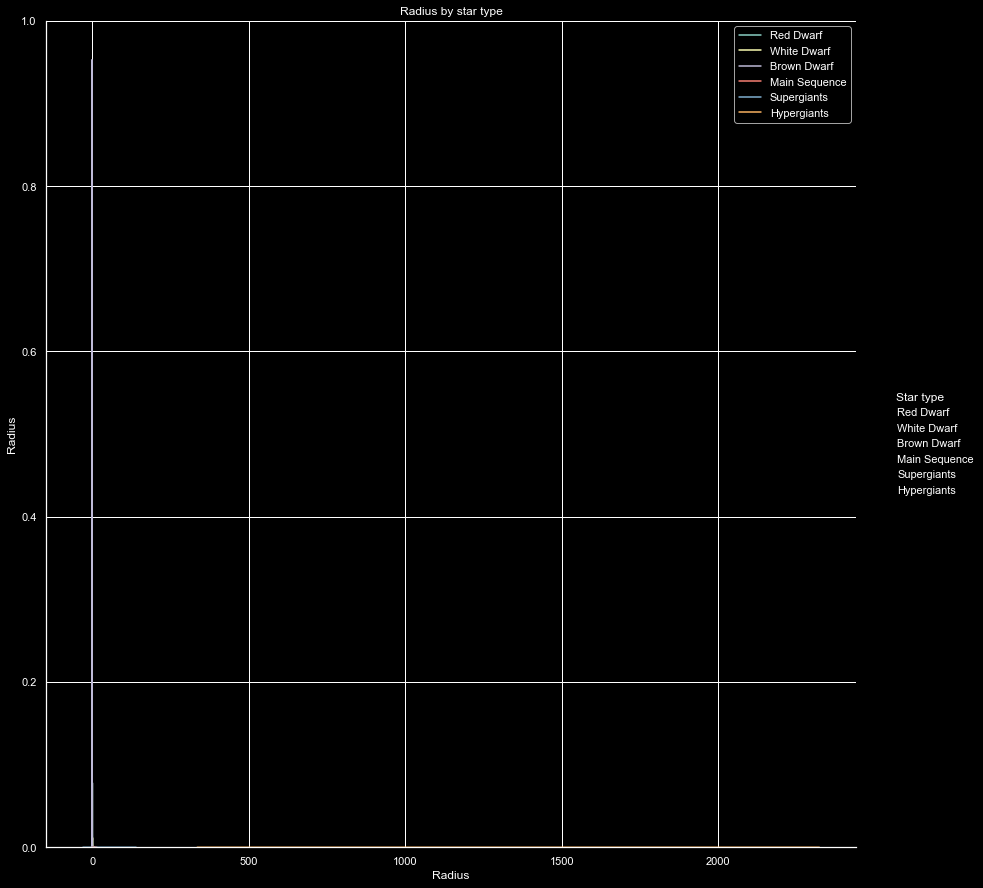

In [181]:
# Display relationships between variables
plt.figure(figsize=(20, 3))
temp_st = df[['Radius','Star type']]
sns.pairplot(temp_st, hue = 'Star type', height=12)
plt.title('Radius by star type')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


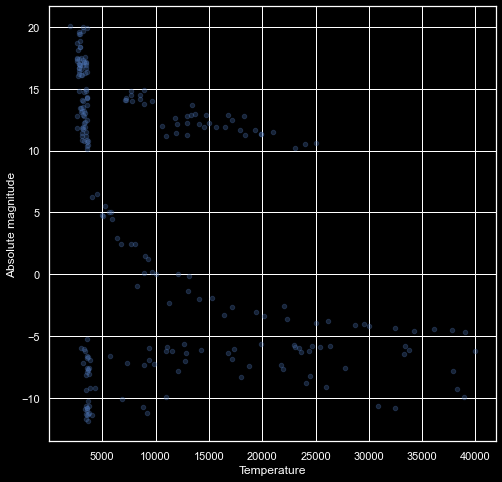

In [182]:
fig, ax = plt.subplots(figsize=(8,8))
df.plot.scatter(x='Temperature', y='Absolute magnitude', ax=ax, alpha=0.3)

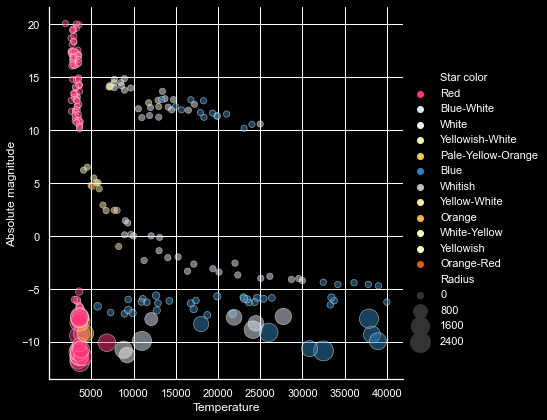

In [183]:
sns.relplot(x="Temperature", y="Absolute magnitude", hue="Star color", size="Radius", 
            sizes=(40, 400), alpha=.5, palette=palette, height=6, data=df)

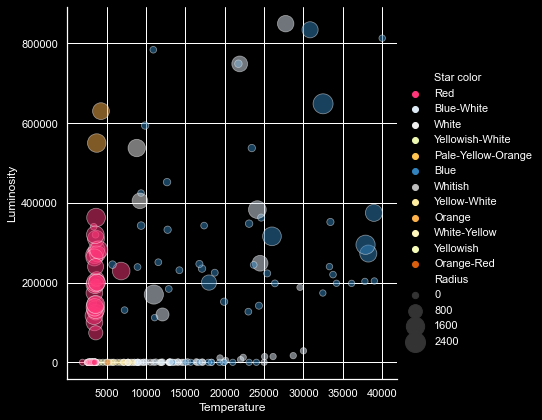

In [184]:
sns.relplot(x="Temperature", y="Luminosity", hue="Star color", size="Radius", 
            sizes=(40, 400), alpha=.5, palette=palette, height=6, data=df)

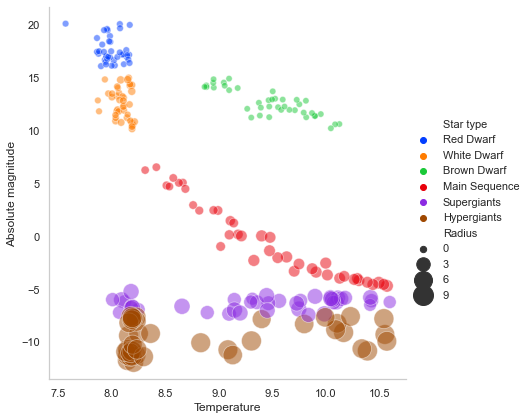

In [220]:
sns.relplot(x="Temperature", y="Absolute magnitude", hue="Star type", size="Radius", 
            sizes=(40, 400), alpha=.5, palette="bright", height=6, data=df)

In [185]:
float_columns = [x for x in df.columns if x not in ['Star type', 'Star color', 'Spectral Class']]

In [186]:
# The correlation matrix
corr_mat = df[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,Temperature,Luminosity,Radius,Absolute magnitude
Temperature,0.000000,0.393404,0.064216,-0.420261
Luminosity,0.393404,0.000000,0.526516,-0.692619
Radius,0.064216,0.526516,0.000000,-0.608728
Absolute magnitude,-0.420261,-0.692619,-0.608728,0.000000


In [187]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

Temperature           Absolute magnitude
Luminosity            Absolute magnitude
Radius                Absolute magnitude
Absolute magnitude            Luminosity
dtype: object

In [188]:
corr_mat.abs().max()

Temperature           0.420261
Luminosity            0.692619
Radius                0.608728
Absolute magnitude    0.692619
dtype: float64

In [189]:
skew_columns = (df[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Luminosity     2.068069
Radius         1.946800
Temperature    1.321568
dtype: float64

In [190]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    df[col] = np.log1p(df[col])


In [191]:
# Highlight cells that hold the maximum value of a column. 
# with styler background_gradient which gives columns a gradient background color based on their values
df[float_columns].describe().T.drop("count", axis=1).style.background_gradient(
    subset=["mean", "50%"], cmap="Reds"
)

,mean,std,min,25%,50%,75%,max
Temperature,8.881177,0.856986,7.570443,8.115297,8.661631,9.619530,10.596660
Luminosity,5.144726,5.860715,0.000080,0.000864,0.068034,12.196280,13.652310
Radius,2.155147,2.638597,0.008365,0.097807,0.566563,3.778060,7.575328
Absolute magnitude,4.382396,10.532512,-11.920000,-6.232500,8.313000,13.697500,20.060000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must 

<Figure size 576x288 with 0 Axes>

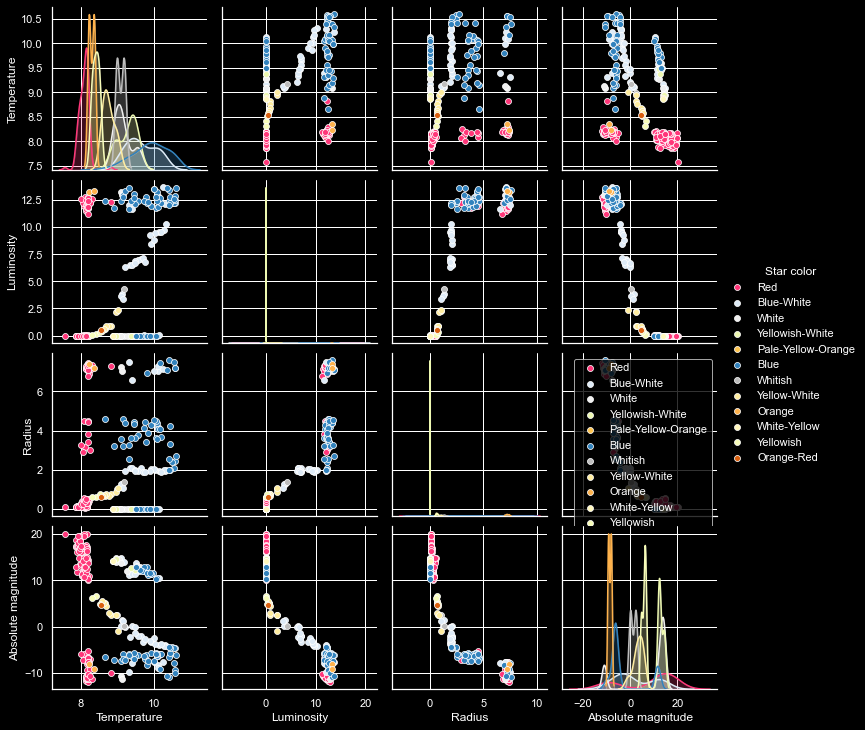

In [192]:
sns.set_context('notebook')
# Display relationships between variables
plt.figure(figsize=(8, 4))
sns.pairplot(df, vars=float_columns, hue="Star color", palette=palette)
plt.legend()

# Model evaluation

In [193]:
dk = df.copy()

In [194]:
ss = StandardScaler()
dk[float_columns] = ss.fit_transform(dk[float_columns])

dk.head(4)

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Star color,Spectral Class
0,-0.996342,-0.879257,-0.758858,1.116745,Red Dwarf,Red,M
1,-1.006291,-0.879582,-0.764021,1.162414,Red Dwarf,Red,M
2,-1.189813,-0.879616,-0.781598,1.362213,Red Dwarf,Red,M
3,-1.103189,-0.879633,-0.762118,1.167171,Red Dwarf,Red,M


## K-MEANS

In [195]:
km = KMeans(n_clusters=6, random_state=42)
km = km.fit(dk[float_columns])

dk['kmeans'] = km.predict(dk[float_columns])

In [196]:
dk.head()

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Star color,Spectral Class,kmeans
0,-0.996342,-0.879257,-0.758858,1.116745,Red Dwarf,Red,M,2
1,-1.006291,-0.879582,-0.764021,1.162414,Red Dwarf,Red,M,2
2,-1.189813,-0.879616,-0.781598,1.362213,Red Dwarf,Red,M,2
3,-1.103189,-0.879633,-0.762118,1.167171,Red Dwarf,Red,M,2
4,-1.532667,-0.879643,-0.781253,1.491607,Red Dwarf,Red,M,2


In [197]:
(dk[['Star type','kmeans']]
 .groupby(['kmeans','Star type'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans Star type            
0      Brown Dwarf        40
1      Hypergiants        27
       Supergiants        10
2      Main Sequence       2
       Red Dwarf          40
       White Dwarf        40
3      Main Sequence      17
       Supergiants        30
4      Hypergiants        13
5      Main Sequence      21

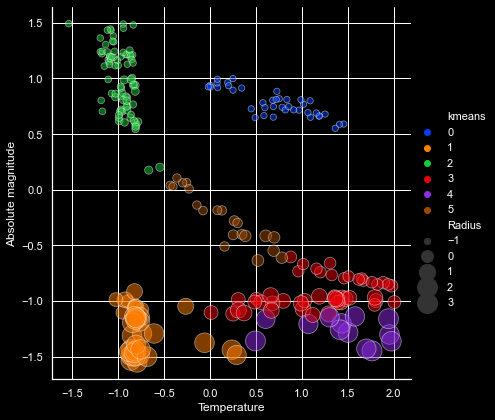

In [198]:
sns.relplot(x="Temperature", y="Absolute magnitude", hue="kmeans", size="Radius", 
            sizes=(40, 400), alpha=.5, palette="bright", height=6, data=dk)

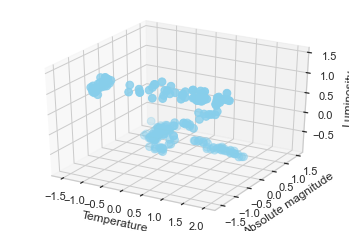

In [199]:
# plot
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap=ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(dk['Temperature'], dk['Absolute magnitude'], dk['Luminosity'], c='skyblue', s=60, cmap=cmap)
ax.set_xlabel('Temperature')
ax.set_ylabel('Absolute magnitude')
ax.set_zlabel('Luminosity')
plt.show()

In [200]:
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(dk[float_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


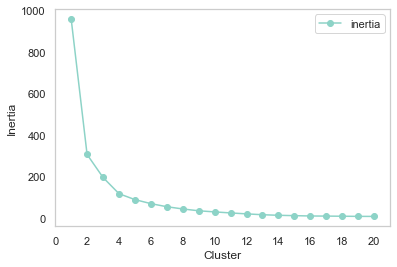

In [201]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

## Hierarchical clustering (Ward)

In [202]:
ag = AgglomerativeClustering(n_clusters=6, linkage='ward', compute_full_tree=True)
ag = ag.fit(dk[float_columns])
dk['hiercl'] = ag.fit_predict(dk[float_columns])

In [203]:
# First, for Agglomerative Clustering:
(dk[['Star type','hiercl']]
 .groupby(['hiercl','Star type'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
hiercl Star type            
0      Hypergiants        24
       Supergiants        10
1      Main Sequence      23
       Supergiants        30
2      Brown Dwarf        40
3      Red Dwarf          40
       White Dwarf        40
4      Hypergiants        16
5      Main Sequence      17

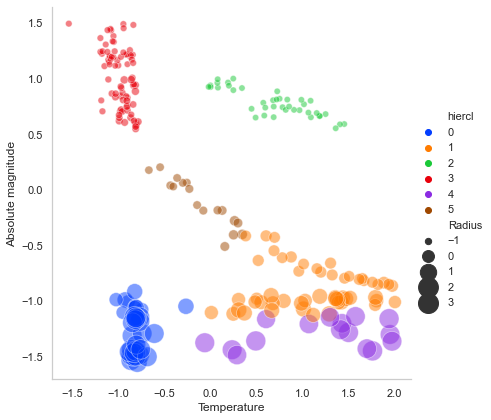

In [204]:
sns.relplot(x="Temperature", y="Absolute magnitude", hue="hiercl", size="Radius", 
            sizes=(40, 400), alpha=.5, palette="bright", height=6, data=dk)

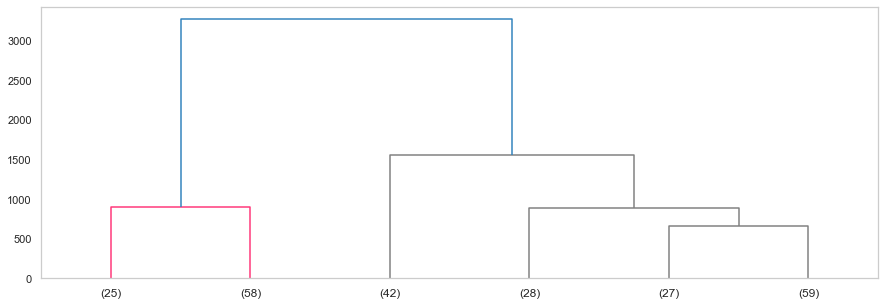

In [205]:
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color setup
red  = "#ff3679"
blue = "#3182bd"

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=6, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

## DBSCAN

In [206]:
dbs = DBSCAN(eps=0.3, min_samples=10)
dbs = dbs.fit(dk[float_columns])

dk['dbscan'] = dbs.fit_predict(dk[float_columns])

In [207]:
labels = dbs.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 5
Estimated no. of noise points: 87


In [208]:
# First, for Agglomerative Clustering:
(dk[['Star type','dbscan']]
 .groupby(['dbscan','Star type'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
dbscan Star type            
-1     Hypergiants        16
       Main Sequence      40
       Red Dwarf           1
       Supergiants        30
 0     Red Dwarf          39
       White Dwarf        40
 1     Brown Dwarf        40
 2     Hypergiants        24
 3     Supergiants        10

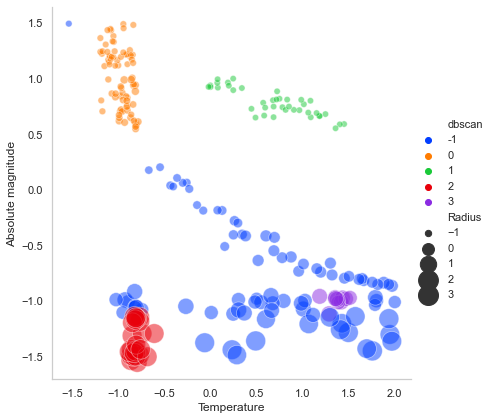

In [209]:
sns.relplot(x="Temperature", y="Absolute magnitude", hue="dbscan", size="Radius", 
            sizes=(40, 400), alpha=.5, palette="bright", height=6, data=dk)

## MeanShift

In [214]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(dk[float_columns], quantile=0.2, n_samples=240)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms = ms.fit(dk[float_columns])
dk['meansh'] = ms.predict(dk[float_columns])

In [215]:
# First, for Agglomerative Clustering:
(dk[['Star type','meansh']]
 .groupby(['meansh','Star type'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
meansh Star type            
0      Main Sequence       2
       Red Dwarf          40
       White Dwarf        40
1      Hypergiants        11
       Main Sequence      18
       Supergiants        20
2      Brown Dwarf        40
3      Hypergiants        28
       Supergiants         1
4      Main Sequence      20
5      Hypergiants         1
       Supergiants        19

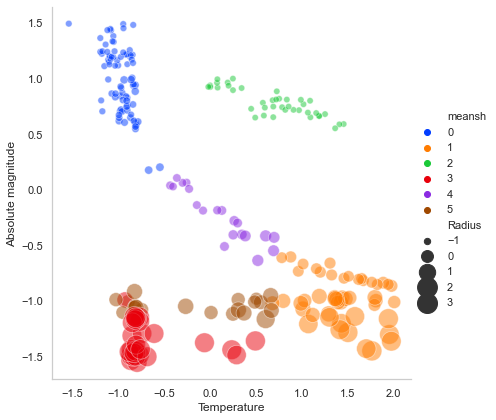

In [216]:
sns.relplot(x="Temperature", y="Absolute magnitude", hue="meansh", size="Radius", 
            sizes=(40, 400), alpha=.5, palette="bright", height=6, data=dk)

## Comparing results between 4 clustering algorithms

In [217]:
# Comparing results:
(dk[['Star type','kmeans','hiercl','dbscan','meansh']]
 .groupby(['Star type','kmeans','hiercl','dbscan','meansh'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Star type     kmeans hiercl dbscan meansh        
Brown Dwarf   0      2       1     2           40
Hypergiants   1      0       2     3           24
                     4      -1     3            3
              4      4      -1     1           11
                                   3            1
                                   5            1
Main Sequence 2      5      -1     0            2
              3      1      -1     1           17
              5      1      -1     1            1
                                   4            5
                     5      -1     4           15
Red Dwarf     2      3      -1     0            1
                             0     0           39
Supergiants   1      0      -1     3            1
                                   5            9
              3      1      -1     1           10
                                   5           10
                             3     1           10
White Dwarf   2      3       0     0           40

In [218]:
# Comparing results:
(dk[['Star type','kmeans','hiercl']]
 .groupby(['Star type','kmeans','hiercl'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Star type     kmeans hiercl        
Brown Dwarf   0      2           40
Hypergiants   1      0           24
                     4            3
              4      4           13
Main Sequence 2      5            2
              3      1           17
              5      1            6
                     5           15
Red Dwarf     2      3           40
Supergiants   1      0           10
              3      1           30
White Dwarf   2      3           40